# CPS1988 dataset

Recommendation: Use `statsmodels` and `pandas` for this exercise.

In [2]:
# Suggested imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

## Exercise a)

Briefly describe the data set:

- Name the dependent variable and the independent variables.
- Which scales of measurement do the variables belong to (e.g., nominal, ordinal, interval or ratio)?
- Does the data set consist of cross-sectional, time-series or panel data?

In [3]:
# Import and print the data
data = pd.read_csv("CPS1988.csv")
data

,wage,education,experience,ethnicity,smsa,region,parttime
0,354.94,7,45,cauc,yes,northeast,no
1,123.46,12,1,cauc,yes,northeast,yes
2,370.37,9,9,cauc,yes,northeast,no
3,754.94,11,46,cauc,yes,northeast,no
4,593.54,12,36,cauc,yes,northeast,no
...,...,...,...,...,...,...,...
28150,356.13,12,13,cauc,no,west,no
28151,308.64,12,8,cauc,no,west,yes
28152,427.35,12,28,cauc,no,west,no
28153,834.02,17,30,cauc,no,west,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28155 entries, 0 to 28154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        28155 non-null  float64
 1   education   28155 non-null  int64  
 2   experience  28155 non-null  int64  
 3   ethnicity   28155 non-null  object 
 4   smsa        28155 non-null  object 
 5   region      28155 non-null  object 
 6   parttime    28155 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ MB


- dependent variable: wage 
- independent variables: education, experience, ethnicity, smsa, region, parttime
- scales of measurements (nominal, ordinal, interval, ratio):
    - Ratio scale: wage, education, experience, age
    - Nominal scale: ethnicity, smsa, region, parttime
- Does the data set consist of cross-sectional, time-series or panel data?
    - It's **cross-sectional data**. It typically provides a snapshot of a population at a specific point in time, which is exactly what this dataset represents - a sample of the US population in 1988.
    - It contains 28,155 observations, each likely representing a different individual at a single point of time.
    - There's no time component or repeated measurement for the same individuals over time, which would be characteristic of time-series or panel data.

## Exercise b)

Plot the dependent variable against each independent variable and transform the variables if necessary.

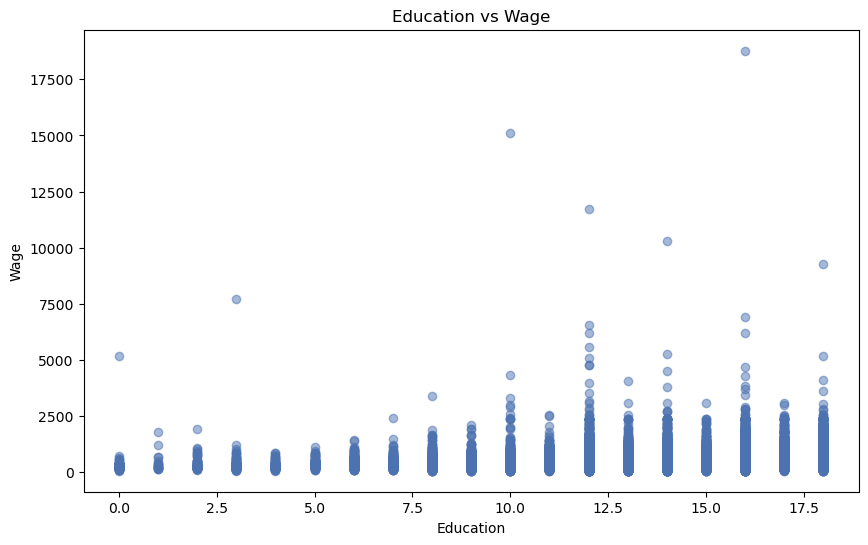

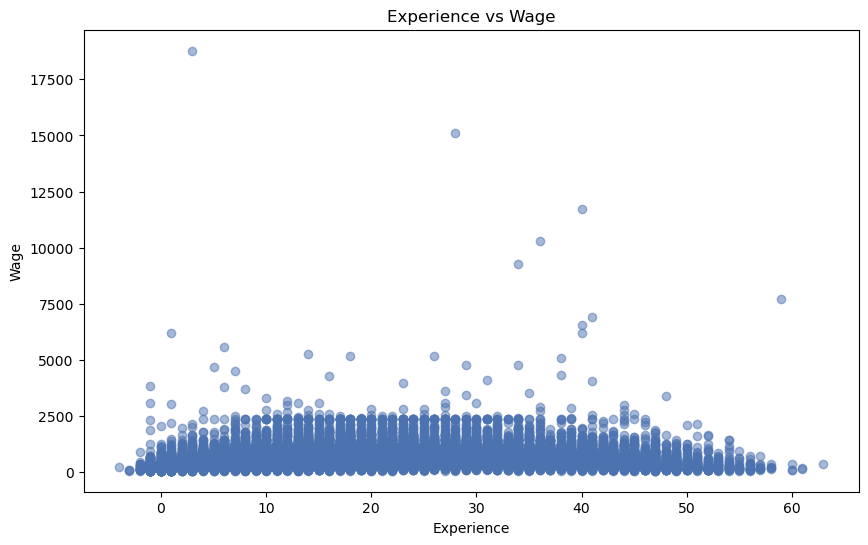

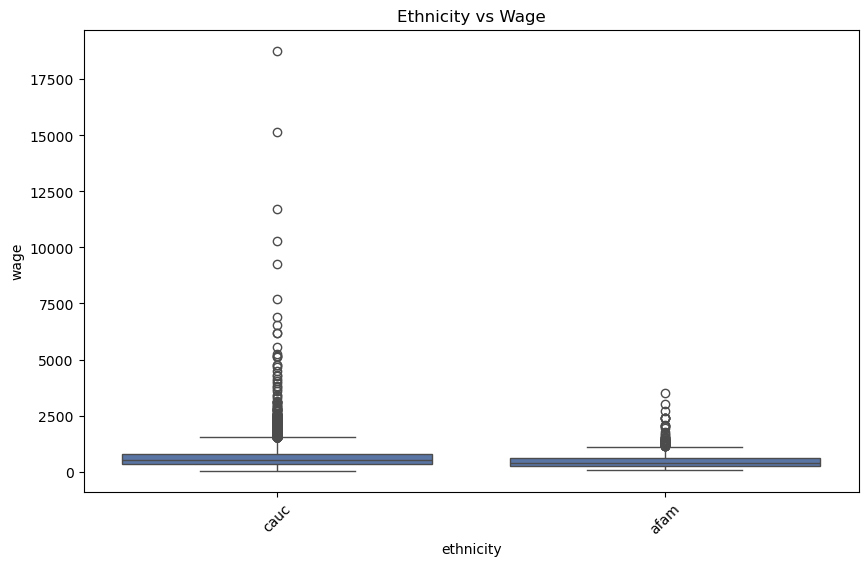

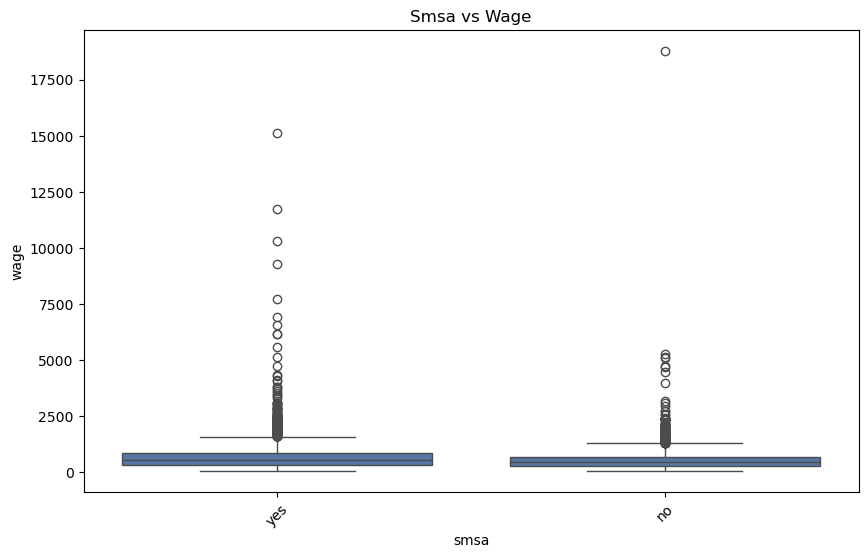

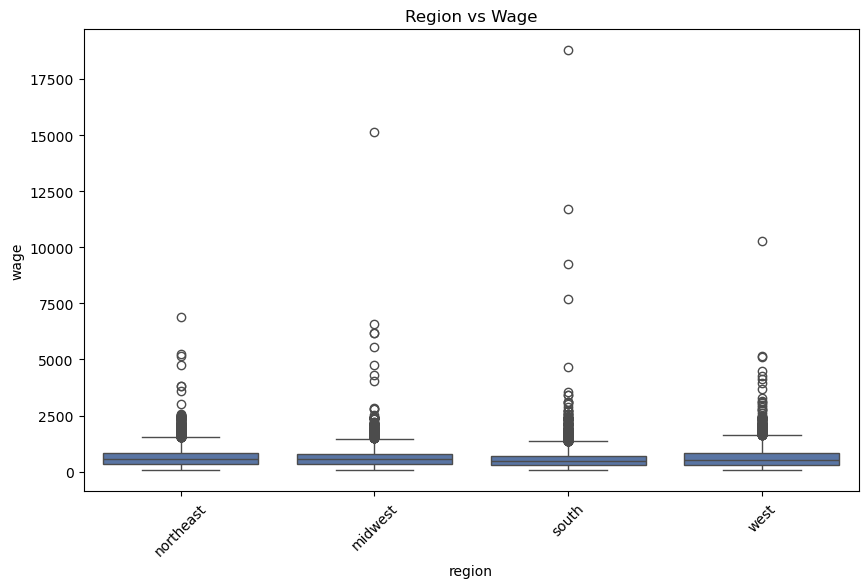

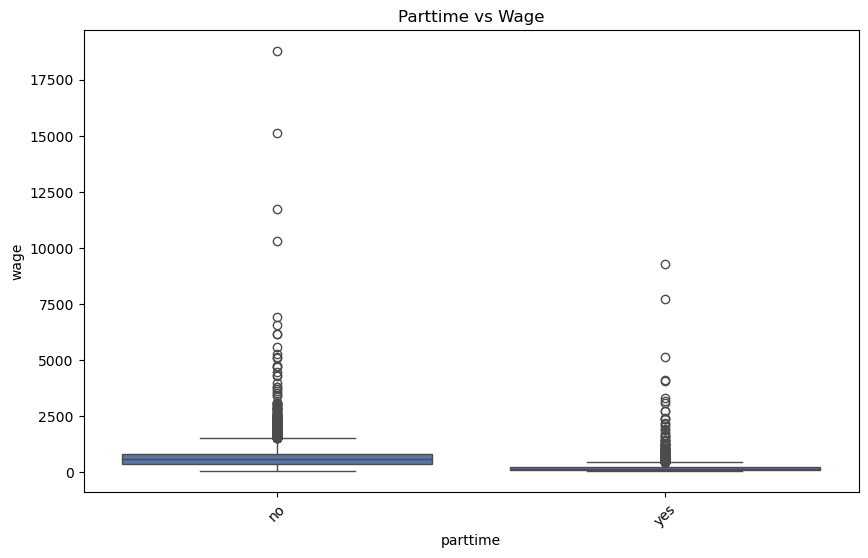

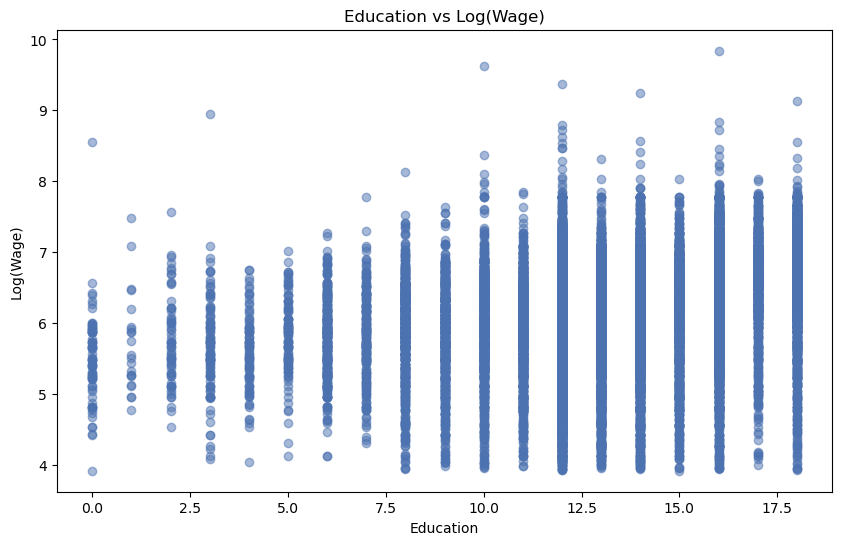

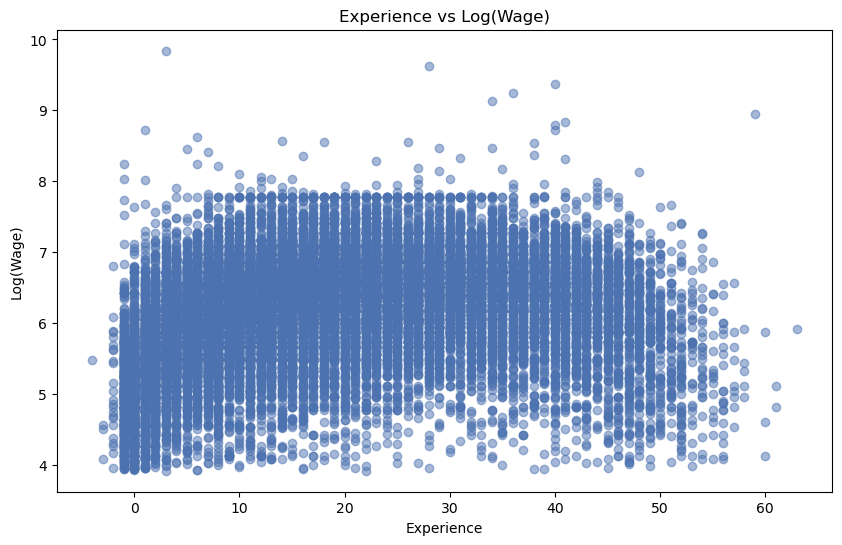

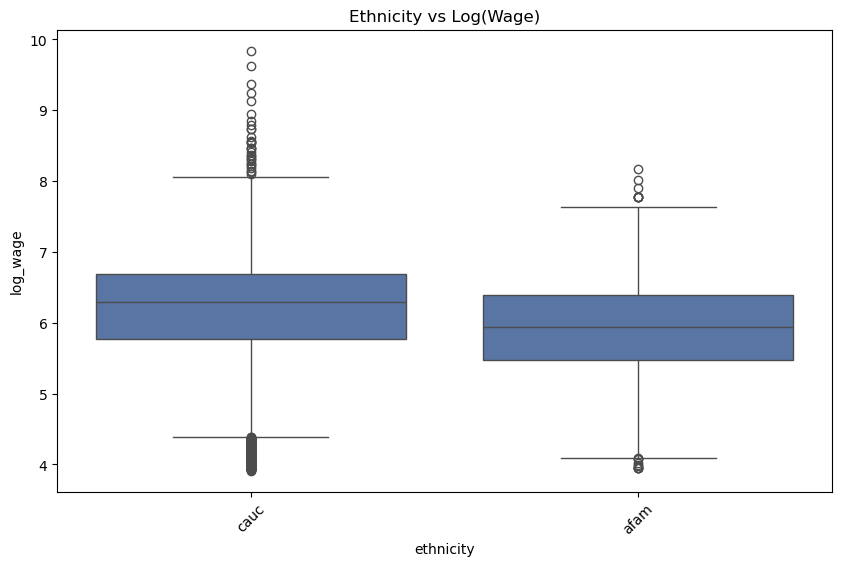

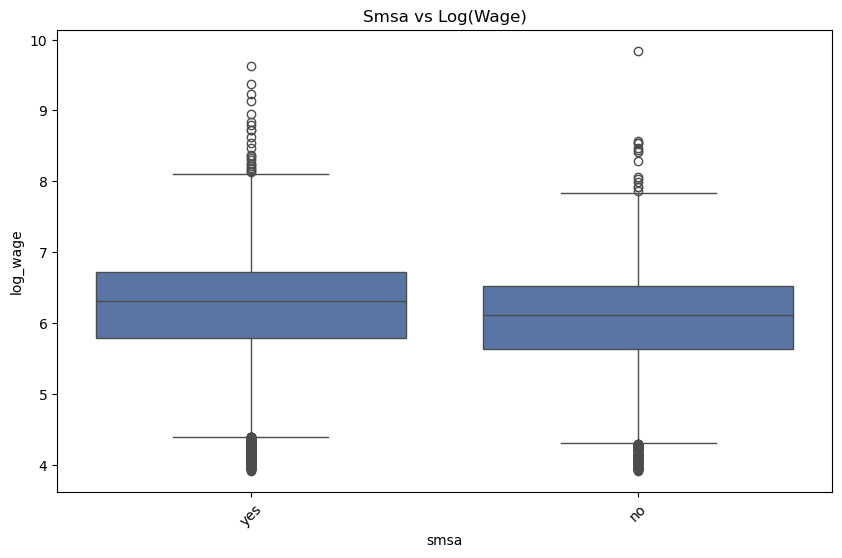

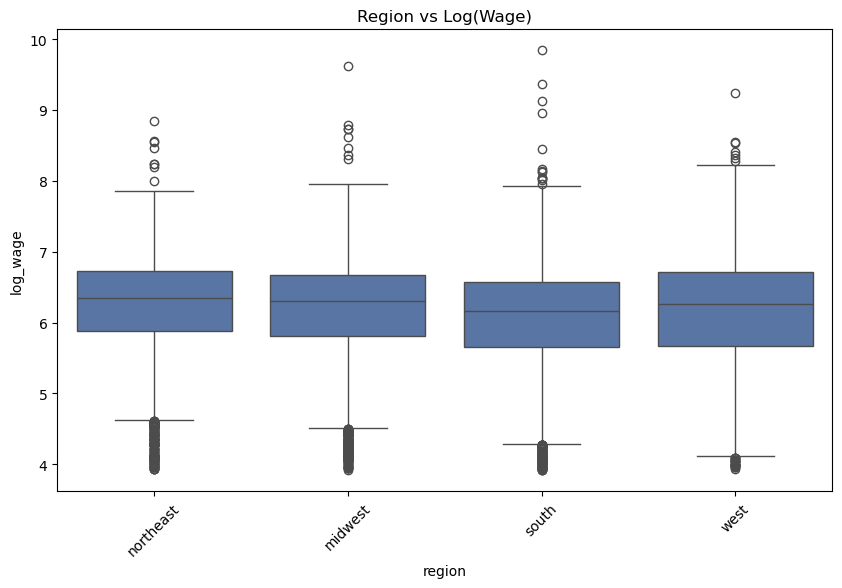

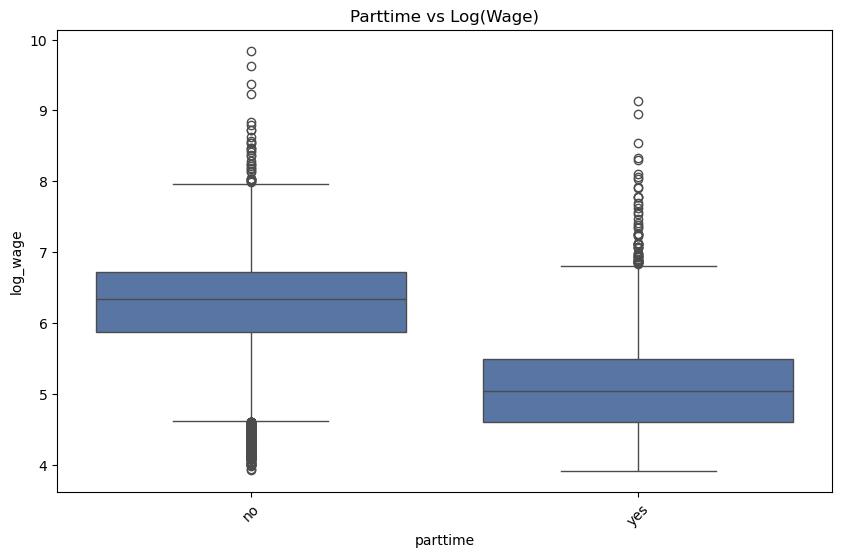

In [6]:
import seaborn as sns

sns.set_palette("deep")

def plot_against_wage(x, y, xlabel, ylabel="Wage"):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    plt.show()

continuous_vars = ['education', 'experience']
for var in continuous_vars:
    plot_against_wage(data[var], data['wage'], var.capitalize())

categorical_vars = ['ethnicity', 'smsa', 'region', 'parttime']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='wage', data=data)
    plt.title(f"{var.capitalize()} vs Wage")
    plt.xticks(rotation=45)
    plt.show()

# Log transformation of wage (transformation)
data['log_wage'] = np.log(data['wage'])

# Plot log(wage) against continuous variables
for var in continuous_vars:
    plot_against_wage(data[var], data['log_wage'], var.capitalize(), "Log(Wage)")

# Plot log(wage) against categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=var, y='log_wage', data=data)
    plt.title(f"{var.capitalize()} vs Log(Wage)")
    plt.xticks(rotation=45)
    plt.show()


Which transformations would you carry out and why? 

- **Log-transformation of wage**: Log transformation often normalizes wage distribution and can linearize relationships.
- It is also often used in wage regression to address right-skewness and interpret coefficients as percentage changes.

In [7]:
data.head()

,wage,education,experience,ethnicity,smsa,region,parttime,log_wage
0,354.94,7,45,cauc,yes,northeast,no,5.871949
1,123.46,12,1,cauc,yes,northeast,yes,4.815917
2,370.37,9,9,cauc,yes,northeast,no,5.914503
3,754.94,11,46,cauc,yes,northeast,no,6.626638
4,593.54,12,36,cauc,yes,northeast,no,6.386105


Estimate the following model:

$$
  \ln( \hat{\text{wage}}_i ) = \hat\beta_0 + \hat\beta_1 \cdot \text{education}_i + \hat\beta_2 \cdot \text{ethnicity}_i + \hat\beta_3 \cdot \text{experience}_i\\
  \phantom{=} + \hat\beta_4 \cdot \text{experience}_i^2.
$$

In [15]:
# Build input data
import statsmodels.formula.api as sm

data = pd.read_csv('CPS1988.csv')

data['log_wage'] = np.log(data['wage'])
data['experience_squared'] = data['experience'] ** 2

model = sm.ols(formula='log_wage ~ education + C(ethnicity) + experience + experience_squared', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               log_wage   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     3541.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        22:31:18   Log-Likelihood:                -24801.
No. Observations:               28155   AIC:                         4.961e+04
Df Residuals:                   28150   BIC:                         4.965e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                4.0780 

- In the formula, we use `C(ethnicity)` to treat ethnicity as a categorical variable. This will automatically create dummy variables for ethnicity.

## Exercise c)

Interpret the model.
- Which variables are statistically significant?
    - To determine statistical significance, we typically look at the **p-values** for each coefficient. Variables with p-values less than 0.05 (assuming a 5% significance level) are considered statistically significant. In this case all of them are significant.
- Is the entire model statistically significant?
    - To determine of the entire model is statistically significant, look at the **F-statistic** and its corresponding p-value at the **bottom of the regression summary**. In this case 0.0, indicating that the entire model is statistically significant.
- What is the explanatory power of the model and why?
    - The explanatory power of the model is typically measured by the **R-squared ($R^2$) and Adjusted R-squared values**. These can be found near the top of the regression summary. Here, we have an $R^2$ of 0.335. That means that 33.5% of the variance in log wage is explained by the model. 
    - R-squared represents the proportion of variance in the dependent variable (log wage) that is predictable from the independent variables.
- Interpret each regression coefficient.
    - Intercept ($\beta 0$): This represents the expected log wage when all other variables are zero. In our case: 4.0780
    - Education ($\beta 1$): For each additional year of education, the expected log wage increases by $\beta 1$, holidng other factors constant. In our case: 0.0857
    - Ethnicity ($\beta 2$): There will be multiple coefficients for ethnicity, one for each category except the reference category. Each coefficient represents the difference in expected log wage for that ethnicity compared to the reference category, holding other factors constant. In our case: 0.2434
    - Experience ($\beta 3$): For each additional year of experience, the expected log wage increases by $\beta 3$, holding other factors constant. In our case: 0.0775
    - Experience squared ($\beta 4$): This captures the **non-linear effect** of experience. If negative (which is common), it indicates diminishing returns to experience. In our case: -0.0013

## Exercise d)

Now consider the following alternative model:

$$
    \ln( \widehat{\text{wage}}_i ) = \hat\beta_0 + \hat\beta_1 \cdot \text{education}_i + \hat\beta_2 \cdot \text{ethnicity}_i + \hat\beta_3 \cdot \text{education}_i \cdot \text{ethnicity}_i\\
    \phantom{=} + \hat\beta_4 \cdot \text{experience}_i + \hat\beta_5 \cdot \text{experience}_i^2.
$$

What is the difference between both models?

- The key difference between this model and the previous one is the inclusion of an interaction term between education and ethnicity.
- The effect of education on log wage can vary depending on ethnicity, and vice versa.

## Exercise e)

Repeat c) with the alternative model.

In [16]:
data['log_wage_new'] = np.log(data['wage'])
data['experience_squared_new'] = data['experience'] ** 2

model = sm.ols(formula='log_wage_new ~ education + C(ethnicity) + education:C(ethnicity) + experience + experience_squared_new', data=data)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_wage_new   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     2834.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:06:52   Log-Likelihood:                -24799.
No. Observations:               28155   AIC:                         4.961e+04
Df Residuals:                   28149   BIC:                         4.966e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   